                                                 Event Dive Number Height  \
0      Senior Women 3m Springboard - (Prelim/Quarte...         NaN    NaN   
1      Senior Women 3m Springboard - (Prelim/Quarte...         NaN    NaN   
2      Senior Women 3m Springboard - (Prelim/Quarte...         NaN    NaN   
3      Senior Women 3m Springboard - (Prelim/Quarte...         NaN    NaN   
4      Senior Women 3m Springboard - (Prelim/Quarte...        \t\t   \t\t   
..                                                 ...         ...    ...   
551              Senior Women 3m Springboard - (Final)      107C\t   3M\t   
552              Senior Women 3m Springboard - (Final)      205C\t   3M\t   
553              Senior Women 3m Springboard - (Final)      305C\t   3M\t   
554              Senior Women 3m Springboard - (Final)     5235D\t   3M\t   
555              Senior Women 3m Springboard - (Final)        \t\t    NaN   

                                  Description  Net Score  DD  Score  \
0   

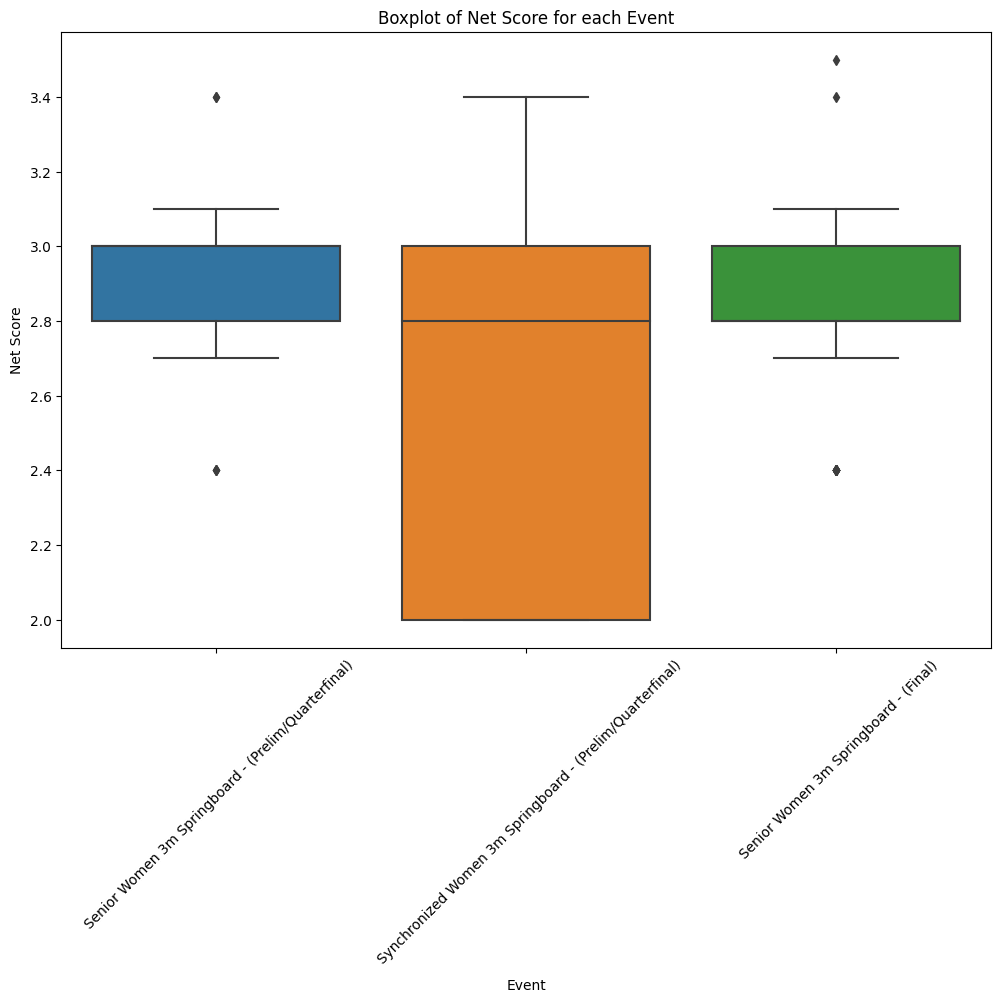

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


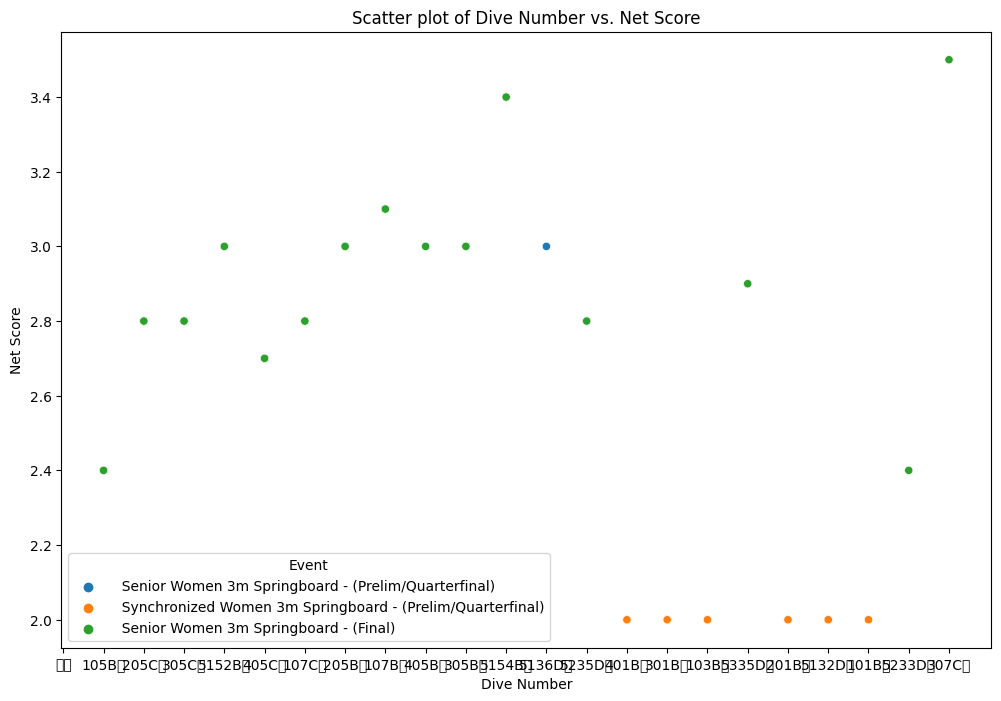

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('output.csv')

df['Net Score'] = pd.to_numeric(df['Net Score'], errors='coerce')

print(df)

plt.figure(figsize=(12, 8))

sns.boxplot(x='Event', y='Net Score', data=df)
plt.title('Boxplot of Net Score for each Event')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Dive Number', y='Net Score', hue='Event', data=df)
plt.title('Scatter plot of Dive Number vs. Net Score')
plt.show()


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('output.csv')

df['Net Score'] = pd.to_numeric(df['Net Score'], errors='coerce')

print(df)

fig = px.box(df, x='Event', y='Net Score', title='Boxplot of Net Score for each Event')
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

fig = px.scatter(df, x='Dive Number', y='Net Score', color='Event', title='Scatter plot of Dive Number vs. Net Score')
fig.show()


                                                 Event Dive Number Height  \
0      Senior Women 3m Springboard - (Prelim/Quarte...         NaN    NaN   
1      Senior Women 3m Springboard - (Prelim/Quarte...         NaN    NaN   
2      Senior Women 3m Springboard - (Prelim/Quarte...         NaN    NaN   
3      Senior Women 3m Springboard - (Prelim/Quarte...         NaN    NaN   
4      Senior Women 3m Springboard - (Prelim/Quarte...        \t\t   \t\t   
..                                                 ...         ...    ...   
551              Senior Women 3m Springboard - (Final)      107C\t   3M\t   
552              Senior Women 3m Springboard - (Final)      205C\t   3M\t   
553              Senior Women 3m Springboard - (Final)      305C\t   3M\t   
554              Senior Women 3m Springboard - (Final)     5235D\t   3M\t   
555              Senior Women 3m Springboard - (Final)        \t\t    NaN   

                                  Description  Net Score  DD  Score  \
0   

In [3]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html

df = pd.read_csv('output.csv')

df['Net Score'] = pd.to_numeric(df['Net Score'], errors='coerce')

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Diving Stats Visualization"),
    
    html.Label("Select Tournament"),
    dcc.Dropdown(
        id='tournament-dropdown',
        options=[{'label': tournament, 'value': tournament} for tournament in df['Event'].unique()],
        value=df['Event'].unique()[0], 
        multi=False
    ),
    
    html.Label("Select Event"),
    dcc.Dropdown(
        id='event-dropdown',
        multi=True
    ),
    
    dcc.Graph(
        id='boxplot',
        figure={}
    ),
    
    dcc.Graph(
        id='scatter-plot',
        figure={}
    ),
])

@app.callback(
    dash.dependencies.Output('event-dropdown', 'options'),
    [dash.dependencies.Input('tournament-dropdown', 'value')]
)
def update_event_dropdown(selected_tournament):
    events = df[df['Event'] == selected_tournament]['Event'].unique()
    return [{'label': event, 'value': event} for event in events]

@app.callback(
    [dash.dependencies.Output('boxplot', 'figure'),
     dash.dependencies.Output('scatter-plot', 'figure')],
    [dash.dependencies.Input('tournament-dropdown', 'value'),
     dash.dependencies.Input('event-dropdown', 'value')]
)
def update_plots(selected_tournament, selected_event):
    if selected_event is None:
        filtered_df = df[df['Event'] == selected_tournament]
    else:
        filtered_df = df[(df['Event'] == selected_tournament) & (df['Event'] == selected_event)]

    boxplot_fig = px.box(filtered_df, x='Event', y='Net Score', title=f'Boxplot of Net Score for {selected_event}')
    boxplot_fig.update_layout(xaxis=dict(tickangle=45))

    scatter_fig = px.scatter(filtered_df, x='Dive Number', y='Net Score', color='Event',
                             title=f'Scatter plot of Dive Number vs. Net Score for {selected_event}')

    return boxplot_fig, scatter_fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Diving Stats Visualization"),
    
    html.Label("Select Tournament"),
    dcc.Dropdown(
        id='tournament-dropdown',
        options=[{'label': tournament, 'value': tournament} for tournament in df['Event'].unique()],
        value=df['Event'].unique()[0],  
        multi=False
    ),
    
    html.Label("Select Event"),
    dcc.Dropdown(
        id='event-dropdown',
        multi=True
    ),
    
    # Boxplot of Net Score for each Event
    dcc.Graph(
        id='boxplot',
        figure={}
    ),
    
    # Scatter plot of Dive Number vs. Net Score
    dcc.Graph(
        id='scatter-plot',
        figure={}
    ),

    # Pie chart for distribution of Dive Numbers
    dcc.Graph(
        id='pie-chart',
        figure={}
    ),

    # Histogram of Net Scores
    dcc.Graph(
        id='histogram',
        figure={}
    ),
    
    # Slider for adjusting the number of bins in histograms
    dcc.Slider(
        id='histogram-bins-slider',
        min=1,
        max=50,
        step=1,
        marks={i: str(i) for i in range(1, 51)},
        value=10,
        tooltip={'placement': 'bottom'},
        updatemode='mouseup'
    ),
])

@app.callback(
    [dash.dependencies.Output('boxplot', 'figure'),
     dash.dependencies.Output('scatter-plot', 'figure'),
     dash.dependencies.Output('pie-chart', 'figure'),
     dash.dependencies.Output('histogram', 'figure')],
    [dash.dependencies.Input('tournament-dropdown', 'value'),
     dash.dependencies.Input('event-dropdown', 'value'),
     dash.dependencies.Input('histogram-bins-slider', 'value')]
)
def update_plots(selected_tournament, selected_event, num_bins):
    if selected_event is None:
        filtered_df = df[df['Event'] == selected_tournament]
    else:
        filtered_df = df[(df['Event'] == selected_tournament) & (df['Event'] == selected_event)]

    boxplot_fig = px.box(filtered_df, x='Event', y='Net Score', title=f'Boxplot of Net Score for {selected_event}')
    boxplot_fig.update_layout(xaxis=dict(tickangle=45))

    scatter_fig = px.scatter(filtered_df, x='Dive Number', y='Net Score', color='Event',
                             title=f'Scatter plot of Dive Number vs. Net Score for {selected_event}')

    pie_chart_fig = px.pie(filtered_df, names='Dive Number', title=f'Distribution of Dive Numbers for {selected_event}')

    histogram_fig = px.histogram(filtered_df, x='Net Score', nbins=num_bins, title=f'Histogram of Net Scores for {selected_event}')
    histogram_fig.update_layout(xaxis_title='Net Score', yaxis_title='Frequency')

    return boxplot_fig, scatter_fig, pie_chart_fig, histogram_fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Diving Stats Visualization"),
    
    # Dropdown for selecting Tournament
    html.Label("Select Tournament"),
    dcc.Dropdown(
        id='tournament-dropdown',
        options=[{'label': tournament, 'value': tournament} for tournament in df['Event'].unique()],
        value=df['Event'].unique()[0],  # Default value
        multi=False
    ),
    
    # Dropdown for selecting Event (All Events or a specific event)
    html.Label("Select Event"),
    dcc.Dropdown(
        id='event-dropdown',
        options=[{'label': 'All Events', 'value': 'all'}] + [{'label': event, 'value': event} for event in df['Event'].unique()],
        value='all',  # Default value
        multi=False
    ),
    
    # Boxplot of Net Score for each Event
    dcc.Graph(
        id='boxplot',
        figure={}
    ),
    
    # Scatter plot of Dive Number vs. Net Score
    dcc.Graph(
        id='scatter-plot',
        figure={}
    ),

    # Pie chart for distribution of Dive Numbers
    dcc.Graph(
        id='pie-chart',
        figure={}
    ),

    # Histogram of Net Scores
    dcc.Graph(
        id='histogram',
        figure={}
    ),

    # Line chart to track diver's performance over events
    dcc.Graph(
        id='line-chart',
        figure={}
    ),

    # Slider for adjusting the number of bins in histograms
    dcc.Slider(
        id='histogram-bins-slider',
        min=1,
        max=50,
        step=1,
        marks={i: str(i) for i in range(1, 51)},
        value=10,
        tooltip={'placement': 'bottom'},
        updatemode='mouseup'
    ),
])

@app.callback(
    [dash.dependencies.Output('boxplot', 'figure'),
     dash.dependencies.Output('scatter-plot', 'figure'),
     dash.dependencies.Output('pie-chart', 'figure'),
     dash.dependencies.Output('histogram', 'figure'),
     dash.dependencies.Output('line-chart', 'figure')],
    [dash.dependencies.Input('tournament-dropdown', 'value'),
     dash.dependencies.Input('event-dropdown', 'value'),
     dash.dependencies.Input('histogram-bins-slider', 'value')]
)
def update_plots(selected_tournament, selected_event, num_bins):
    if selected_event == 'all':
        filtered_df = df[df['Event'] == selected_tournament]
    else:
        filtered_df = df[df['Event'] == selected_event]

    boxplot_fig = px.box(filtered_df, x='Event', y='Net Score', points='all', title=f'Boxplot of Net Score for {selected_event}')
    boxplot_fig.update_layout(xaxis=dict(tickangle=45))  # Adjust layout settings

    scatter_fig = px.scatter(filtered_df, x='Dive Number', y='Net Score', color='Event',
                             title=f'Scatter plot of Dive Number vs. Net Score for {selected_event}')

    pie_chart_fig = px.pie(filtered_df, names='Dive Number', title=f'Distribution of Dive Numbers for {selected_event}')

    histogram_fig = px.histogram(filtered_df, x='Net Score', nbins=num_bins, title=f'Histogram of Net Scores for {selected_event}')
    histogram_fig.update_layout(xaxis_title='Net Score', yaxis_title='Frequency')

    line_chart_fig = px.line(filtered_df, x='Event', y='Net Score', color='Dive Number', markers=True,
                             title=f'Tracking Diver\'s Performance Over Events')
    line_chart_fig.update_layout(xaxis=dict(tickangle=45), showlegend=True)  # Adjust layout settings

    return boxplot_fig, scatter_fig, pie_chart_fig, histogram_fig, line_chart_fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [6]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

df = pd.read_csv('output.csv')  

app = dash.Dash(__name__)

app.layout = html.Div([
    # Dropdown for selecting Event
    html.Label("Select Event"),
    dcc.Dropdown(
        id='event-dropdown',
        options=[{'label': event, 'value': event} for event in df['Event'].unique()],
        value=df['Event'].unique()[0],  # Default value
        multi=False
    ),

    # Slider for adjusting the number of bins in histograms
    dcc.Slider(
        id='histogram-bins-slider',
        min=1,
        max=50,
        step=1,
        marks={i: str(i) for i in range(1, 51)},
        value=10,
        tooltip={'placement': 'bottom'},
        updatemode='mouseup'
    ),

    # Histogram of Net Scores
    dcc.Graph(
        id='histogram',
        figure={}
    ),
])

@app.callback(
    Output('histogram', 'figure'),
    [Input('event-dropdown', 'value'),
     Input('histogram-bins-slider', 'value')]
)
def update_histogram(selected_event, num_bins):
    filtered_df = df[df['Event'] == selected_event]

    histogram_fig = px.histogram(filtered_df, x='Net Score', nbins=num_bins)
    histogram_fig.update_layout(xaxis_title='Net Score', yaxis_title='Frequency')

    return histogram_fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [7]:
# Python
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

df = pd.read_csv('output.csv') 

app = dash.Dash(__name__)

app.layout = html.Div([
    
    # Boxplot of Scores
    dcc.Graph(
        id='boxplot',
        figure={}
    ),

    # Scatter plot of Scores vs DD
    dcc.Graph(
        id='scatter-plot',
        figure={}
    ),
])

@app.callback(
    [Output('histogram', 'figure'),
     Output('boxplot', 'figure'),
     Output('scatter-plot', 'figure')],
    [Input('event-dropdown', 'value'),
     Input('histogram-bins-slider', 'value')]
)
def update_plots(selected_event, num_bins):
    # Filter the data based on the selected event
    filtered_df = df[df['Event'] == selected_event]

    # Update histogram of Net Scores
    histogram_fig = px.histogram(filtered_df, x='Net Score', nbins=num_bins)
    histogram_fig.update_layout(xaxis_title='Net Score', yaxis_title='Frequency')

    # Update boxplot of Scores
    boxplot_fig = px.box(filtered_df, y='Score')
    boxplot_fig.update_layout(yaxis_title='Score')

    # Update scatter plot of Scores vs DD
    scatter_fig = px.scatter(filtered_df, x='DD', y='Score')
    scatter_fig.update_layout(xaxis_title='Difficulty Degree (DD)', yaxis_title='Score')

    return histogram_fig, boxplot_fig, scatter_fig

if __name__ == '__main__':
    app.run_server(debug=True)